**Завдання 1. Структури даних. Сортування. Робота з однозв'язним списком**

Реалізація однозв'язного списку

In [15]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None  # Посилання на наступний вузол

class LinkedList:
    def __init__(self):
        self.head = None  # Початок списку

    def append(self, data):
        new_node = Node(data)  # Створення нового вузла
        if not self.head:  # Якщо список порожній
            self.head = new_node  # Новий вузол стає початком списку
            return
        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node  # Додаємо новий вузол в кінець списку

    def print_list(self):
        current = self.head
        while current:  # Прохід по всіх вузлах списку
            print(current.data, end=" -> ")  # Вивід даних поточного вузла
            current = current.next  # Перехід до наступного вузла
        print("None")  # Після останнього вузла виводимо None


Реверсування однозв'язного списку

In [16]:
def reverse_linked_list(llist):

    prev = None  # Попередній вузол
    current = llist.head  # Поточний вузол

    while current:
        # Збереження наступного вузла, перш ніж змінити посилання
        next_node = current.next

        # Реверс посилання - наступний вузол стає попереднім
        current.next = prev

        # Зсув вперед по списку
        prev = current
        current = next_node

    # Оновлення голови списку, щоб вона вказувала на новий перший вузол
    llist.head = prev


Сортування для однозв'язного списку злиттям, об'єднання двох відсортованих однозв'язих списків в один відсортований список.

In [17]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return

        last_node = self.head
        while last_node.next:
            last_node = last_node.next
        last_node.next = new_node

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")

    def reverse(self):
        prev = None
        current = self.head
        while current:
            next_node = current.next
            current.next = prev
            prev = current
            current = next_node
        self.head = prev

    def sort_insertion(self):
        sorted_list = LinkedList()
        while self.head:
            current_node = self.head
            self.head = self.head.next

            prev = None
            current = sorted_list.head
            while current and current.data < current_node.data:
                prev = current
                current = current.next

            if prev:
                prev.next = current_node
            else:
                sorted_list.head = current_node
            current_node.next = current

        self.head = sorted_list.head

    def merge_sorted(self, other_list):
        merged_list = LinkedList()
        current1 = self.head
        current2 = other_list.head

        while current1 and current2:
            if current1.data <= current2.data:
                merged_list.append(current1.data)
                current1 = current1.next
            else:
                merged_list.append(current2.data)
                current2 = current2.next

        # Append remaining nodes if any
        while current1:
            merged_list.append(current1.data)
            current1 = current1.next
        while current2:
            merged_list.append(current2.data)
            current2 = current2.next

        return merged_list

def merge_sort_linked_list(head):
    if not head or not head.next:
        return head

    middle = get_middle(head)
    next_to_middle = middle.next
    middle.next = None

    left = merge_sort_linked_list(head)
    right = merge_sort_linked_list(next_to_middle)

    sorted_list = sorted_merge(left, right)
    return sorted_list

def sorted_merge(left, right):
    result = None
    if not left:
        return right
    if not right:
        return left

    if left.data <= right.data:
        result = left
        result.next = sorted_merge(left.next, right)
    else:
        result = right
        result.next = sorted_merge(left, right.next)

    return result

def get_middle(head):
    if not head:
        return head

    slow = head
    fast = head

    while fast.next and fast.next.next:
        slow = slow.next
        fast = fast.next.next

    return slow

# Приклад використання:
if __name__ == "__main__":
    # Створюємо список
    linked_list = LinkedList()
    linked_list.append(4)
    linked_list.append(2)
    linked_list.append(1)
    linked_list.append(3)
    linked_list.append(5)

    print("Original list:")
    linked_list.print_list()

    # Сортування та вивід списку
    linked_list.sort_insertion()
    print("\nSorted list:")
    linked_list.print_list()

    # Створюємо інший список
    other_list = LinkedList()
    other_list.append(7)
    other_list.append(6)
    other_list.append(8)
    other_list.append(9)

    print("\nOriginal second list:")
    other_list.print_list()

    # Об'єднання та сортування об'єднаного списку
    merged = linked_list.merge_sorted(other_list)
    print("\nMerged and sorted list:")
    merged.print_list()

    # Приклад сортування злиттям
    print("\nMerge sort:")
    sorted_head = merge_sort_linked_list(merged.head)
    while sorted_head:
        print(sorted_head.data, end=" -> ")
        sorted_head = sorted_head.next
    print("None")


Original list:
4 -> 2 -> 1 -> 3 -> 5 -> None

Sorted list:
1 -> 2 -> 3 -> 4 -> 5 -> None

Original second list:
7 -> 6 -> 8 -> 9 -> None

Merged and sorted list:
1 -> 2 -> 3 -> 4 -> 5 -> 7 -> 6 -> 8 -> 9 -> None

Merge sort:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> 7 -> 8 -> 9 -> None


**Завдання 2. Рекурсія. Створення фрактала “дерево Піфагора” за допомогою рекурсії**

Введіть рівень рекурсії: 9


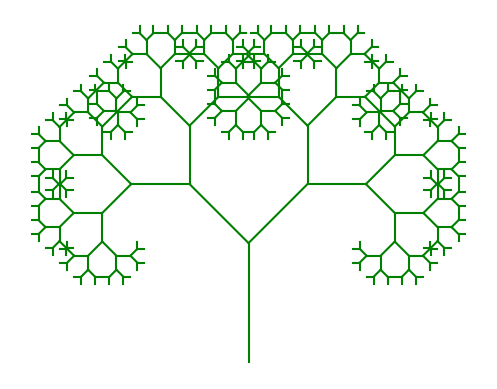

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def draw_pifagoras_tree(ax, x, y, length, angle, level):
    if level == 0:
        return
    x_end = x + length * np.cos(np.radians(angle))
    y_end = y + length * np.sin(np.radians(angle))
    ax.plot([x, x_end], [y, y_end], color='green')
    draw_pifagoras_tree(ax, x_end, y_end, length * 0.7, angle - 45, level - 1)
    draw_pifagoras_tree(ax, x_end, y_end, length * 0.7, angle + 45, level - 1)

def main():
    length = 100  # довжина початкової гілки
    level = int(input("Введіть рівень рекурсії: "))

    fig, ax = plt.subplots()
    ax.set_aspect('equal', 'box')
    ax.axis('off')

    draw_pifagoras_tree(ax, 0, 0, length, 90, level)

    plt.show()

if __name__ == "__main__":
    main()


**Завдання 3. Дерева, алгоритм Дейкстри**

In [19]:
import heapq  # Імпортуємо бібліотеку heapq для роботи з бінарною купою (пірамідою)

class Graph:
    def __init__(self):
        self.edges = {}  # Словник для зберігання ребер графа та їх ваги

    def add_edge(self, from_node, to_node, weight):
        if from_node not in self.edges:
            self.edges[from_node] = []
        self.edges[from_node].append((to_node, weight))  # Додаємо ребро та його вагу

def dijkstra(graph, start):
    # Ініціалізуємо пріоритетну чергу
    priority_queue = []  # Використовуємо бінарну купу для оптимізації
    heapq.heappush(priority_queue, (0, start))  # Додаємо початкову вершину з вагою 0

    # Словник для зберігання найкоротших шляхів до кожної вершини
    shortest_path = {start: (None, 0)}  # Початковий шлях - None, вага - 0

    while priority_queue:
        current_weight, current_node = heapq.heappop(priority_queue)

        # Перевіряємо, чи вершина вже була відвідана коротшим шляхом
        if current_weight > shortest_path[current_node][1]:
            continue

        for neighbor, weight in graph.edges.get(current_node, []):
            distance = current_weight + weight
            if neighbor not in shortest_path or distance < shortest_path[neighbor][1]:
                shortest_path[neighbor] = (current_node, distance)
                heapq.heappush(priority_queue, (distance, neighbor))

    return shortest_path

def construct_path(shortest_path, start, end):
    path = []
    current_node = end
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_path[current_node][0]
        current_node = next_node
    path.reverse()
    return path

# Приклад використання:
graph = Graph()
graph.add_edge('A', 'B', 1)
graph.add_edge('A', 'C', 4)
graph.add_edge('B', 'C', 2)
graph.add_edge('B', 'D', 5)
graph.add_edge('C', 'D', 1)

start_node = 'A'
shortest_paths = dijkstra(graph, start_node)

# Виведення найкоротших шляхів від початкової вершини до всіх інших
for node in shortest_paths:
    print(f"Найкоротший шлях з {start_node} до {node}: {construct_path(shortest_paths, start_node, node)} з відстанню {shortest_paths[node][1]}")


Найкоротший шлях з A до A: ['A'] з відстанню 0
Найкоротший шлях з A до B: ['A', 'B'] з відстанню 1
Найкоротший шлях з A до C: ['A', 'B', 'C'] з відстанню 3
Найкоротший шлях з A до D: ['A', 'B', 'C', 'D'] з відстанню 4


**Завдання 4. Візуалізація піраміди**

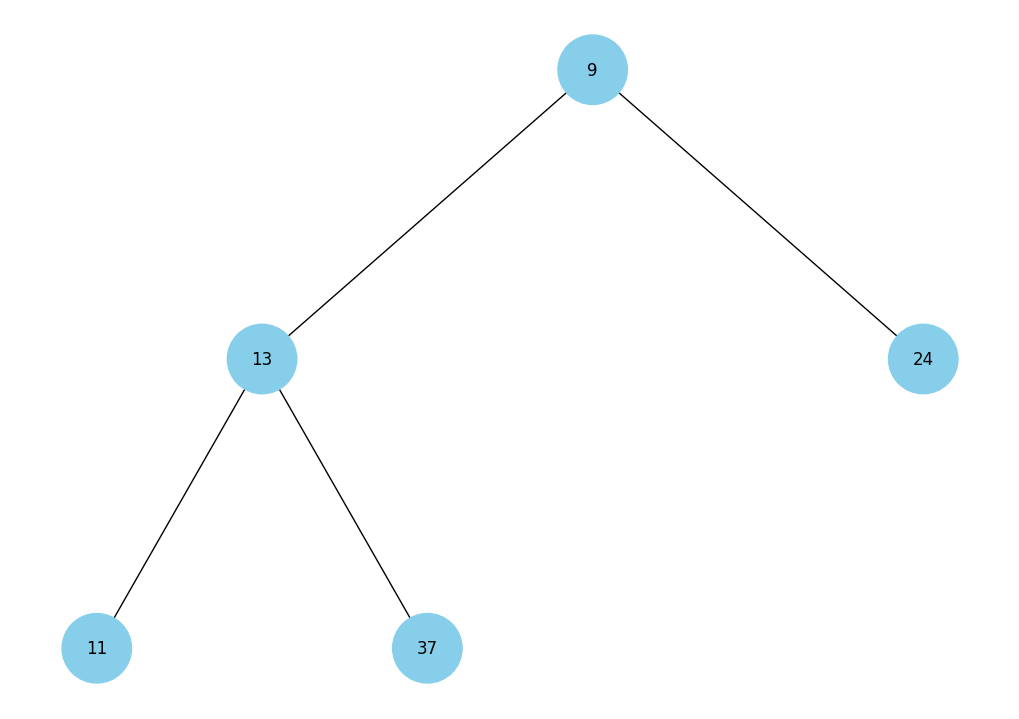

In [20]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}

    plt.figure(figsize=(10, 7))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

def array_to_heap(array):
    if not array:
        return None

    nodes = [Node(val) for val in array]
    for i in range(len(nodes)):
        left_index = 2 * i + 1
        right_index = 2 * i + 2
        if left_index < len(nodes):
            nodes[i].left = nodes[left_index]
        if right_index < len(nodes):
            nodes[i].right = nodes[right_index]

    return nodes[0]

def visualize_heap(array):
    root = array_to_heap(array)
    draw_tree(root)

# Приклад використання:
heap_array = [9, 13, 24, 11, 37]
visualize_heap(heap_array)



**Завдання 5. Візуалізація обходу бінарного дерева**

Initial Tree:


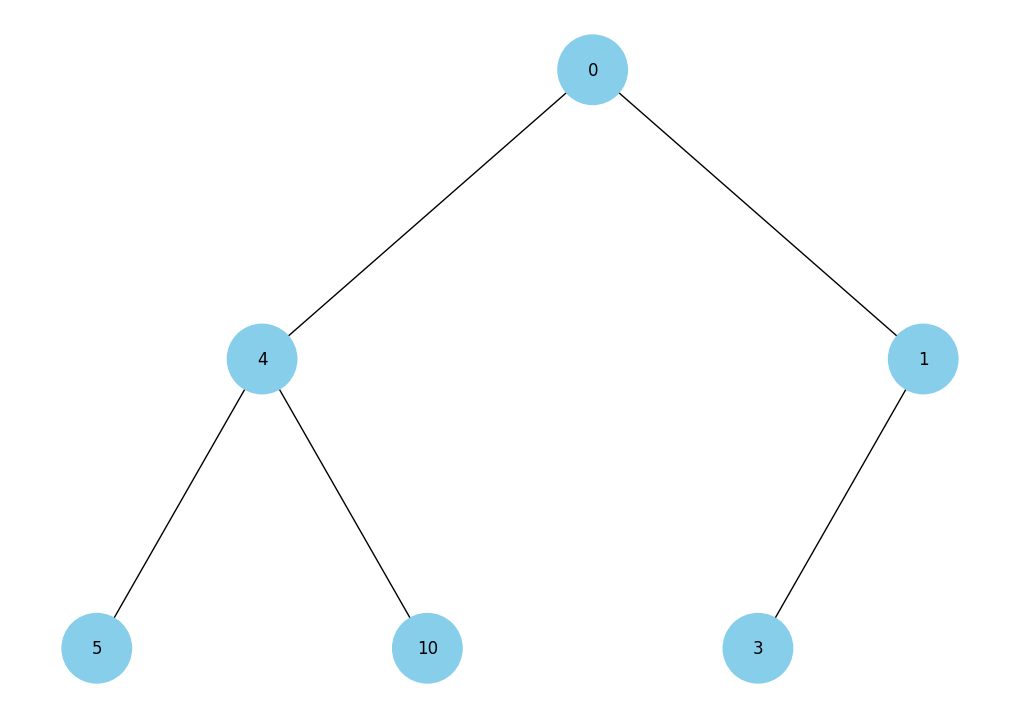

Depth-First Search (DFS) using stack:


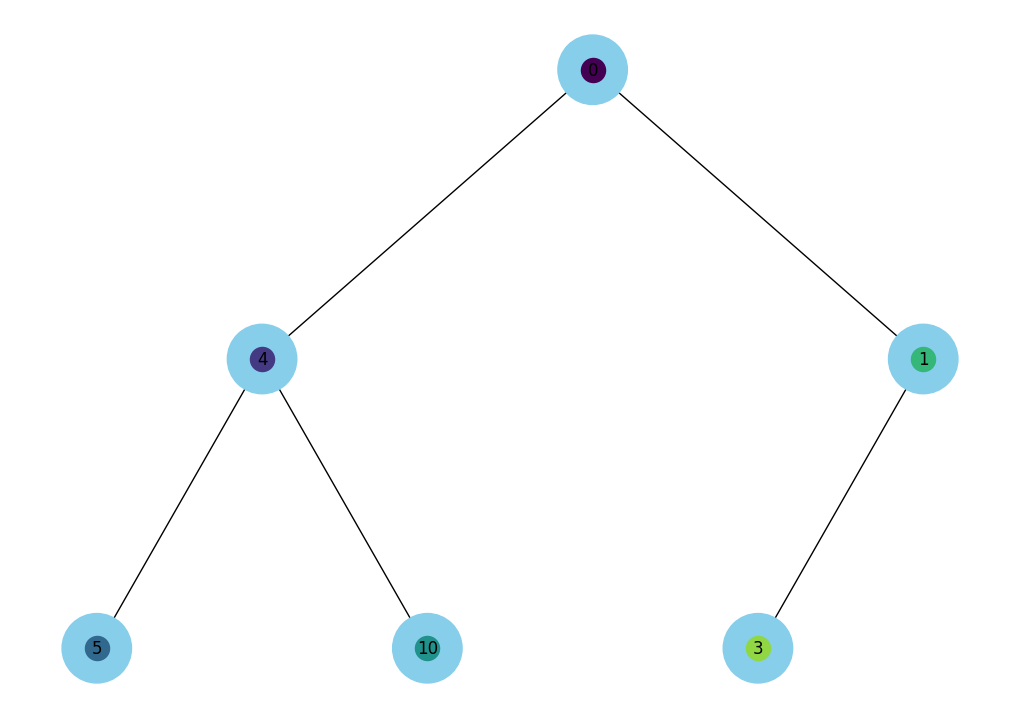

Breadth-First Search (BFS) using queue:


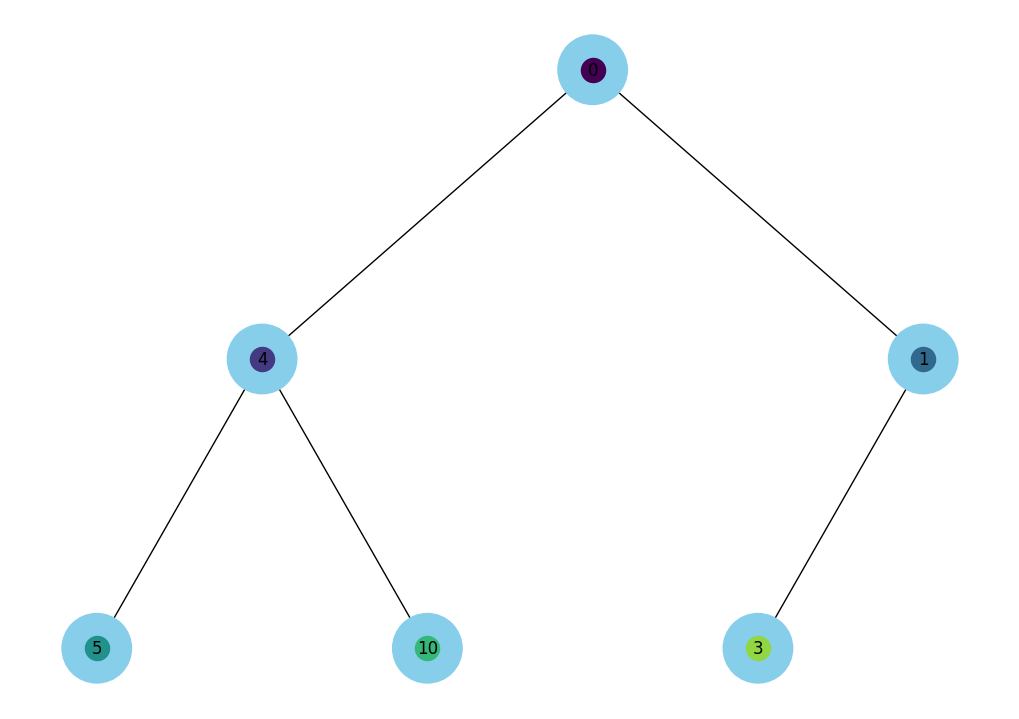

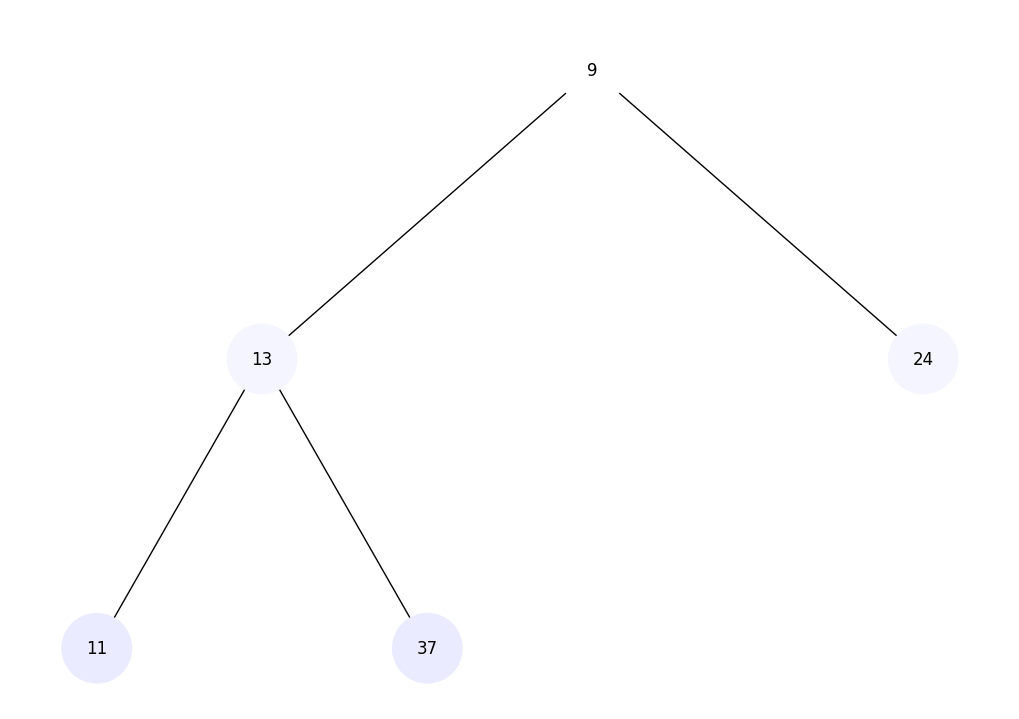

In [26]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm


class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())  # Unique identifier for each node


def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph


def draw_tree(tree_root, visited_nodes=None):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}

    plt.figure(figsize=(10, 7))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)

    if visited_nodes:
        # Generate color gradients for visited nodes
        cmap = getattr(cm, 'viridis', None)  # Handle potential deprecation
        if cmap:
            for i, node in enumerate(visited_nodes):
                node_color = rgb2hex(cmap(i / len(visited_nodes))[:3])
                nx.draw_networkx_nodes(tree, pos, nodelist=[node.id], node_color=node_color)

    plt.show()


# Depth-First Search (DFS) using stack
def dfs_stack(root):
    visited_nodes = []
    stack = [root]
    while stack:
        current = stack.pop()
        if current:
            visited_nodes.append(current)
            stack.append(current.right)
            stack.append(current.left)
    return visited_nodes


# Breadth-First Search (BFS) using queue
def bfs_queue(root):
    visited_nodes = []
    queue = [root]
    while queue:
        current = queue.pop(0)
        if current:
            visited_nodes.append(current)
            queue.append(current.left)
            queue.append(current.right)
    return visited_nodes


# Create tree
root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

# Initial tree visualization
print("Initial Tree:")
draw_tree(root)

# DFS visualization using stack
visited_nodes_dfs_stack = dfs_stack(root)
print("Depth-First Search (DFS) using stack:")
draw_tree(root, visited_nodes_dfs_stack)

# BFS visualization using queue
visited_nodes_bfs_queue = bfs_queue(root)
print("Breadth-First Search (BFS) using queue:")
draw_tree(root, visited_nodes_bfs_queue)


# Приклад використання:
heap_array = [9, 13, 24, 11, 37]
visualize_traversal(heap_array, "breadth_first")


Завдання 6. Жадібні алгоритми та динамічне програмування

In [27]:
def greedy_algorithm(items, budget):
    # Сортування страв за спаданням співвідношення калорій до вартості
    sorted_items = sorted(items.items(), key=lambda x: x[1]['calories'] / x[1]['cost'], reverse=True)

    total_cost = 0
    total_calories = 0
    chosen_items = []

    for item, info in sorted_items:
        if total_cost + info['cost'] <= budget:
            chosen_items.append(item)
            total_cost += info['cost']
            total_calories += info['calories']

    return chosen_items, total_cost, total_calories

items = {
    "pizza": {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog": {"cost": 30, "calories": 200},
    "pepsi": {"cost": 10, "calories": 100},
    "cola": {"cost": 15, "calories": 220},
    "potato": {"cost": 25, "calories": 350}
}

budget = 100
chosen_items, total_cost, total_calories = greedy_algorithm(items, budget)
print("Greedy Algorithm Result:")
print("Chosen Items:", chosen_items)
print("Total Cost:", total_cost)
print("Total Calories:", total_calories)

Greedy Algorithm Result:
Chosen Items: ['cola', 'potato', 'pepsi', 'hot-dog']
Total Cost: 80
Total Calories: 870


In [29]:
def dynamic_programming(items, budget):
    # Ініціалізація таблиці dp, де dp[i][w] зберігає максимальні калорії, які можна отримати при бюджеті w, використовуючи перші i страв
    num_items = len(items)
    dp = [[0] * (budget + 1) for _ in range(num_items + 1)]
    item_list = list(items.items())

    # Заповнення таблиці dp
    for i, (item_name, info) in enumerate(item_list, start=1):
        cost = info['cost']
        calories = info['calories']
        for w in range(budget + 1):
            if cost <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - cost] + calories)
            else:
                dp[i][w] = dp[i - 1][w]

    # Визначення обраних страв
    chosen_items = []
    remaining_budget = budget
    for i in range(num_items, 0, -1):
        if dp[i][remaining_budget] != dp[i - 1][remaining_budget]:
            item_name, info = item_list[i - 1]
            chosen_items.append(item_name)
            remaining_budget -= info['cost']

    total_calories = dp[num_items][budget]
    total_cost = sum(items[item]['cost'] for item in chosen_items)

    return chosen_items, total_cost, total_calories

chosen_items_dp, total_cost_dp, total_calories_dp = dynamic_programming(items, budget)
print("Dynamic Programming Result:")
print("Chosen Items:", chosen_items_dp)
print("Total Cost:", total_cost_dp)
print("Total Calories:", total_calories_dp)


Dynamic Programming Result:
Chosen Items: ['potato', 'cola', 'pepsi', 'pizza']
Total Cost: 100
Total Calories: 970


**Завдання 7. Використання методу Монте-Карло**

Результати симуляції Монте-Карло:
Сума: 2, Імовірність: 2.90%
Сума: 3, Імовірність: 5.54%
Сума: 4, Імовірність: 8.18%
Сума: 5, Імовірність: 11.09%
Сума: 6, Імовірність: 14.10%
Сума: 7, Імовірність: 16.71%
Сума: 8, Імовірність: 14.00%
Сума: 9, Імовірність: 10.95%
Сума: 10, Імовірність: 8.23%
Сума: 11, Імовірність: 5.59%
Сума: 12, Імовірність: 2.71%


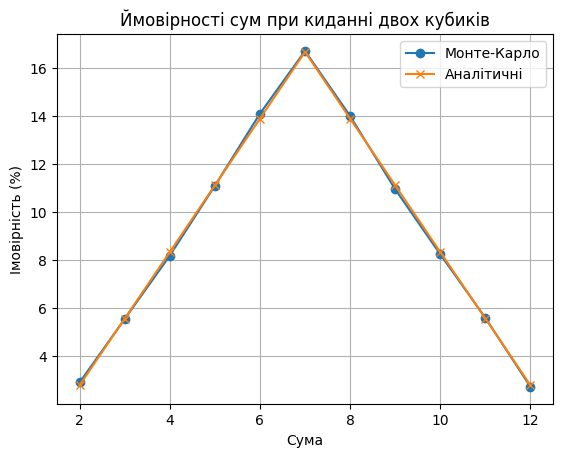

In [30]:
import random
import matplotlib.pyplot as plt

def roll_dice():
       return random.randint(1, 6)

def monte_carlo_simulation(num_simulations):
    """Функція для проведення симуляції методом Монте-Карло"""
    sums_count = {i: 0 for i in range(2, 13)}

    for _ in range(num_simulations):
        dice_sum = roll_dice() + roll_dice()
        sums_count[dice_sum] += 1

    # Розрахунок ймовірностей для кожної суми
    probabilities = {k: (v / num_simulations) * 100 for k, v in sums_count.items()}
    return probabilities

# Налаштування симуляції
num_simulations = 100000

# Запуск симуляції Монте-Карло
probabilities = monte_carlo_simulation(num_simulations)

# Виведення результатів
print("Результати симуляції Монте-Карло:")
for sum_val, prob in probabilities.items():
    print(f"Сума: {sum_val}, Імовірність: {prob:.2f}%")

# Аналітичні значення для порівняння
analytical_probabilities = {
    2: 2.78,
    3: 5.56,
    4: 8.33,
    5: 11.11,
    6: 13.89,
    7: 16.67,
    8: 13.89,
    9: 11.11,
    10: 8.33,
    11: 5.56,
    12: 2.78
}

# Розрахунок середньої кількості кидків для порівняння з теоретичними значеннями
average_rolls = sum(probabilities.values()) / len(probabilities)

# Побудова графіку
fig, ax = plt.subplots()
x = list(probabilities.keys())
y_simulation = list(probabilities.values())
y_analytical = [analytical_probabilities[i] for i in x]

ax.plot(x, y_simulation, label='Монте-Карло', marker='o')
ax.plot(x, y_analytical, label='Аналітичні', marker='x')
ax.set_xlabel('Сума')
ax.set_ylabel('Імовірність (%)')
ax.set_title('Ймовірності сум при киданні двох кубиків')
ax.legend()
plt.grid()
plt.show()

# Запис результатів у файл README.md
with open('README.md', 'w') as f:
    f.write("# Результати симуляції Монте-Карло та порівняння з аналітичними значеннями\n\n")
    f.write("### Результати симуляції Монте-Карло:\n")
    f.write("| Сума | Імовірність (%) |\n")
    f.write("|------|------------------|\n")
    for sum_val, prob in probabilities.items():
        f.write(f"| {sum_val} | {prob:.2f} |\n")

    f.write("\n### Аналітичні значення:\n")
    f.write("| Сума | Імовірність (%) |\n")
    f.write("|------|------------------|\n")
    for sum_val, prob in analytical_probabilities.items():
        f.write(f"| {sum_val} | {prob:.2f} |\n")

    f.write(f"\nСередня кількість кидків на одну суму: {average_rolls:.2f}")


Точність методу Монте-Карло:

Результати симуляції методом Монте-Карло демонструють високу точність, що дуже близька до аналітичних значень. Це підтверджує, що метод Монте-Карло є надійним і ефективним підходом для оцінки ймовірностей.

Використання методу:

Метод Монте-Карло виявляється корисним у випадках, коли аналітичний розрахунок є складним або непрактичним. Для обробки великих обсягів даних або аналізу складних систем цей метод дозволяє отримувати точні оцінки без значних обчислювальних витрат.

Графічне порівняння:

Графік показує, що отримані ймовірності методом Монте-Карло практично збігаються з аналітичними значеннями, що ще раз підтверджує правильність проведеної симуляції. Це свідчить про потужність і ефективність методу Монте-Карло у статистичних дослідженнях та можливість його використання у різних областях для оцінки ймовірностей та інших статистичних параметрів.